DEBUG:root:Initialized P-grid using projection +proj=stere +lon_0=0 +lat_0=60 +lat_ts=60 +ellps=sphere
DEBUG:root:Lower left corner lon/lat of grid: (-20,60)
DEBUG:root:Grid spacing in projection coords: (4e+03,4e+03)
DEBUG:root:Number of grid Nodes in x/y      : (  500,  300)
DEBUG:root:Min   x projection coordinate = -1.1e+06
DEBUG:root:Max   x projection coordinate = 9.02e+05
DEBUG:root:Min   y projection coordinate = 1.64e+05
DEBUG:root:Max   y projection coordinate = 1.37e+06
DEBUG:root:Min lon = -29.6
DEBUG:root:Max lon = 24.8
DEBUG:root:Min lat = 60
DEBUG:root:Max lat = 72.3


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


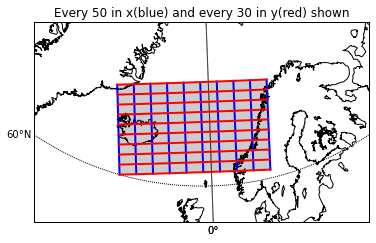

In [29]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

import modeltools.grid
import matplotlib.pyplot
grid1=modeltools.grid.Proj4Grid("+proj=stere +lon_0=0 +lat_0=60 +lat_ts=60 +ellps=sphere",
                              -20,60,4000,4000,500,300)
figure=grid1.plotgrid(2)
matplotlib.pyplot.show()

DEBUG:root:Initialized P-grid using projection +proj=stere +lon_0=0 +lat_0=40 +lat_ts=40 +ellipse=sphere
DEBUG:root:Lower left corner lon/lat of grid: (-70,10)
DEBUG:root:Grid spacing in projection coords: (2e+04,2e+04)
DEBUG:root:Number of grid Nodes in x/y      : (  800,  400)
DEBUG:root:Min   x projection coordinate = -8.63e+06
DEBUG:root:Max   x projection coordinate = 7.39e+06
DEBUG:root:Min   y projection coordinate = -7.94e+05
DEBUG:root:Max   y projection coordinate = 7.23e+06
DEBUG:root:Min lon = -180
DEBUG:root:Max lon = 180
DEBUG:root:Min lat = 9.83
DEBUG:root:Max lat = 89.9


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


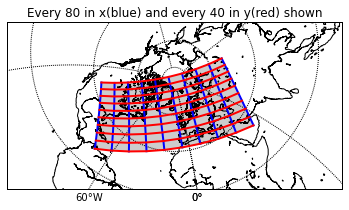

In [30]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

import modeltools.grid
import matplotlib.pyplot
grid2=modeltools.grid.Proj4Grid("+proj=stere +lon_0=0 +lat_0=40 +lat_ts=40 +ellipse=sphere",
                              -70,10,20000,20000,800,400)
figure=grid2.plotgrid(2)
matplotlib.pyplot.show()

In [31]:
import modeltools.hycom.io

grid1.write_my_projection_info()
regf = modeltools.hycom.io.write_regional_grid(grid1)
regf = modeltools.hycom.io.write_newpos(grid1)

grid1.Nx*grid1.Ny*8*2


DEBUG:root:Endianness set to big


<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>


2400000

DEBUG:root:Initialized P-grid using projection  +proj=stere +lon_0=0 +lat_0=60 +lat_ts=60 +ellps=sphere
DEBUG:root:Lower left corner lon/lat of grid: (-20,60)
DEBUG:root:Grid spacing in projection coords: (4e+03,4e+03)
DEBUG:root:Number of grid Nodes in x/y      : (  500,  300)
DEBUG:root:Min   x projection coordinate = -1.1e+06
DEBUG:root:Max   x projection coordinate = 9.02e+05
DEBUG:root:Min   y projection coordinate = 1.64e+05
DEBUG:root:Max   y projection coordinate = 1.37e+06
DEBUG:root:Min lon = -29.6
DEBUG:root:Max lon = 24.8
DEBUG:root:Min lat = 60
DEBUG:root:Max lat = 72.3


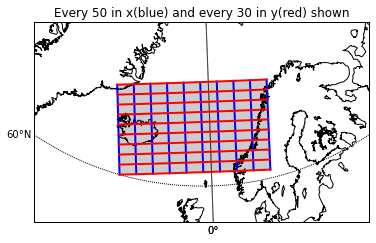

In [32]:
grid1 = modeltools.grid.Proj4Grid.grid_from_file(filename="proj.info")
figure=grid1.plotgrid(2)
matplotlib.pyplot.show()

In [33]:
run modeltools/test

DEBUG:root:Initialized P-grid using projection +proj=stere +lon_0=0 +lat_0=60 +lat_ts=60 +ellps=sphere
DEBUG:root:Lower left corner lon/lat of grid: (-20,60)
DEBUG:root:Grid spacing in projection coords: (4e+03,4e+03)
DEBUG:root:Number of grid Nodes in x/y      : (  500,  300)
DEBUG:root:Min   x projection coordinate = -1.1e+06
DEBUG:root:Max   x projection coordinate = 9.02e+05
DEBUG:root:Min   y projection coordinate = 1.64e+05
DEBUG:root:Max   y projection coordinate = 1.37e+06
DEBUG:root:Min lon = -29.6
DEBUG:root:Max lon = 24.8
DEBUG:root:Min lat = 60
DEBUG:root:Max lat = 72.3
.DEBUG:root:Initialized P-grid using projection +proj=stere +lon_0=0 +lat_0=60 +lat_ts=60 +ellps=sphere
DEBUG:root:Lower left corner lon/lat of grid: (-20,60)
DEBUG:root:Grid spacing in projection coords: (4e+03,4e+03)
DEBUG:root:Number of grid Nodes in x/y      : (  500,  300)
DEBUG:root:Min   x projection coordinate = -1.1e+06
DEBUG:root:Max   x projection coordinate = 9.02e+05
DEBUG:root:Min   y projectio

DEBUG:root:Endianness set to big


pattern :  ^(.*)'(idm   )'[ =]*
line    :  500   'idm   '
match: <_sre.SRE_Match object at 0x109a4bf10>
pattern :  ^(.*)'(jdm   )'[ =]*
line    :  300   'jdm   '
match: <_sre.SRE_Match object at 0x109a4bf10>
pattern :  ^(.*)'(mapflg)'[ =]*
line    :  -1   'mapflg'
match: <_sre.SRE_Match object at 0x109a4bf10>


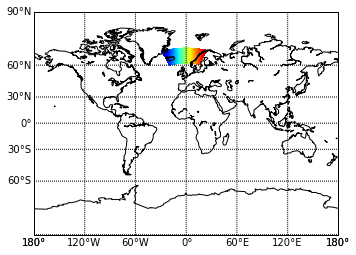

In [42]:
import numpy
from mpl_toolkits.basemap import Basemap
za = modeltools.hycom.io.ABFileRegionalGrid("regional.grid","r")
lo = za.readfield("plon")
la = za.readfield("plat")
m = Basemap(projection='mill')
x,y=m(lo,la)
m.drawcoastlines()
m.drawmapboundary() # draw a line around the map region
m.drawparallels(numpy.arange(-90.,120.,30.),labels=[1,0,0,0]) # draw parallels
m.drawmeridians(numpy.arange(0.,420.,60.),labels=[0,0,0,1]) # draw meridians
m.pcolormesh(x,y,lo)   
